# **nltk 객체 활용하기**
nltk token

## **1 nltk 객체 정의하기**
Token List 객체를 생성한 뒤, 이를 활용하여 nltk 객체를 만든다

In [3]:
# 법령조문 데이터 불러오기
from konlpy.corpus import kobill
doc_ko   = kobill.open('1809890.txt').read() # 법전 데이터 불러오기

# 명사 Token 추출하기
from konlpy.tag import Twitter
twitter = Twitter()
tokens  = twitter.nouns(doc_ko)
tokens[:5]

['지방공무원법', '일부', '개정', '법률', '안']

In [5]:
# nltk Token 객체를 활용한 다양한 메소드를 제동
import nltk
ko_Text = nltk.Text(tokens, name='법안제출')
ko_Text

<Text: 법안제출>

## **2 nltk 객체 활용하기**
내부 메서드를 활용한다

In [7]:
# Token 들 중 연어목록을 출력한다
ko_Text.collocations()

초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직


In [4]:
ko.common_contexts(['근로자'])

중_육아휴직 및_육아휴직 및_대상


In [5]:
# 인접하여 위치하는 Token 을 출력
ko.concordance('초등학교', width=8, lines=3)

Displaying 3 of 6 matches:
규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 주요 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 육아휴직 
요 나이 현재 공무원 자녀 양육 육아휴직 수 자녀 나이 만 세 이하 초등학교 저학년 자녀 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 것임 
 안 지방공무원법 일부 다음 개정 제 조제 항제 호 중 만 세 이하 초등학교 취학 전 자녀 만 세 이하 취학 중인 경우 초등학교 학년 이하 의 


In [6]:
ko.concordance_list('초등학교')[0]

ConcordanceLine(left=['의', '자', '정의화', '이명수', '김을동', '이사철', '여상규', '안규백', '황영철', '박영아', '김정훈', '김학송', '의원', '인', '제안', '이유', '및', '주요', '내용'], query='초등학교', right=['저학년', '경우', '부모', '사랑', '필요', '나이', '현재', '공무원', '자녀', '양육', '육아휴직', '수', '자녀', '나이', '만', '세', '이하', '초등학교'], offset=35, left_print='백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 주요 내용', right_print='저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 육아휴직', line='백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 주요 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 육아휴직')

In [7]:
# Token 의 빈도값 출력
ko.count('초등학교')

6

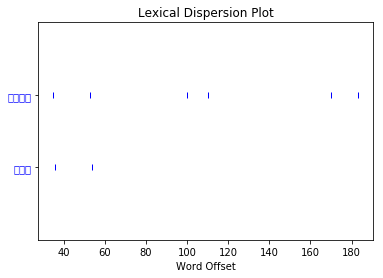

In [8]:
%matplotlib inline
# 해당 단어별 출현빈도 비교출력
ko.dispersion_plot(['초등학교', '저학년'])

In [9]:
ko.findall('초등학교')

등학; 등학; 등학; 등학; 등학; 등학


In [10]:
# 
ko.generate(['초등학교', '저학년'])

In [11]:
# 객체의 인덱스 이름 출력하기
ko.index

<bound method Text.index of <Text: 법안제출>>

In [12]:
# 객체의 이름만 출력
ko.name

'법안제출'

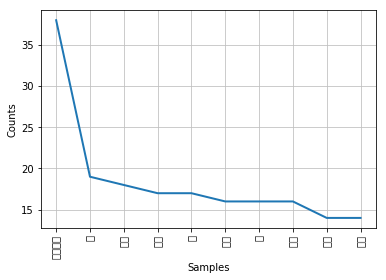

In [13]:
# 객체의 빈도를 Matplot linechart 로 출력
ko.plot(10)

In [14]:
# ko.readability('biline')
ko.similar('초등학교',num=20)

In [15]:
# Token의 출현빈도 상위객체 출력
# ko.tokens(['초등학교', '저학년'])
ko.vocab().most_common(10)

[('육아휴직', 38),
 ('만', 19),
 ('이하', 18),
 ('비용', 17),
 ('액', 17),
 ('경우', 16),
 ('세', 16),
 ('대체', 16),
 ('자녀', 14),
 ('고용', 14)]

<br></br>
# **Konlpy**
nltk Token 객체를 생성한 뒤 이를 활용한다

<br>
# **1 Word Cloud**

<br>
##  **1 데이터 전처리**
텍스트 불러온 뒤 불용어 전처리

In [16]:
# 법령조문 데이터 불러오기
from konlpy.corpus import kobill
files_ko = kobill.fileids()
doc_ko   = kobill.open('1809890.txt').read()
doc_ko[:500]

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자'

In [17]:
# token 중 명사들만 추출하기
from konlpy.tag import Twitter
t         = Twitter()
tokens_ko = t.nouns(doc_ko)
tokens_ko[:10]

['지방공무원법', '일부', '개정', '법률', '안', '정의화', '의원', '대표', '발의', '의']

In [18]:
# stopwords 불용어 전처리
print(len(tokens_ko))
stop_words = ['.', '(', ')', ',', "'", "%", "-", "X", ").", 
             "x", "의", "자", "에", "안", "반", "번", '호', 
             '을', '이', '다', '만', '로', '가', '를']
tokens_ko  = [each_word  for each_word  in tokens_ko   if  each_word  not in stop_words]
len(tokens_ko)

735


680

<br>
##  **2 token list 객체를 nltk 모듈의 객체로 변환**
다양한 method 함수들을 활용가능한 객체를 생성한다

In [19]:
# nltk Token 객체를 활용하여 단어빈도등 내부 에서드를 활용한다
import nltk
ko = nltk.Text(tokens_ko, name='법안제출')
ko.vocab() 

FreqDist({'육아휴직': 38, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '대체': 16, '자녀': 14, '고용': 14, '제': 13, ...})

In [20]:
%matplotlib inline
from matplotlib import rc
rc('font', family='NanumGothic')

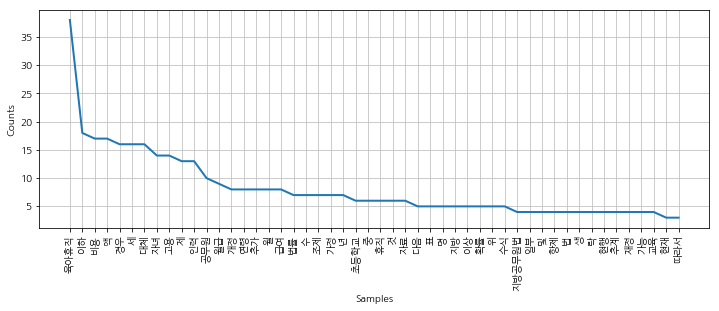

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
ko.plot(50)
plt.show()

<br>
##  3 nltk 객체 활용하기
ko

In [22]:
# 객체내 Token의 빈도를 계산한다
ko.count('초등학교')

6

In [23]:
# 해당 Token이 출현한 주변단어들을 출력한다
ko.concordance('초등학교', width=5, lines=3)

Displaying 3 of 6 matches:
규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 주요 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 육아휴직 
 필요 나이 현재 공무원 자녀 양육 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 것임 
 개정 법률 지방공무원법 일부 다음 개정 제 조제 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 자녀 부


In [24]:
# 연어로 분석되는 객체들을 출력한다
ko.collocations()

초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직


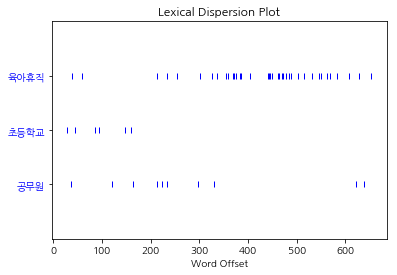

In [25]:
# 해당되는 단어의 출현빈도를 시각화 한다
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

In [26]:
data = ko.vocab().most_common(150)
data = dict(data)
data

{'육아휴직': 38,
 '이하': 18,
 '비용': 17,
 '액': 17,
 '경우': 16,
 '세': 16,
 '대체': 16,
 '자녀': 14,
 '고용': 14,
 '제': 13,
 '인력': 13,
 '공무원': 10,
 '월급': 9,
 '개정': 8,
 '연령': 8,
 '추가': 8,
 '월': 8,
 '급여': 8,
 '법률': 7,
 '수': 7,
 '조제': 7,
 '가정': 7,
 '년': 7,
 '초등학교': 6,
 '중': 6,
 '휴직': 6,
 '것': 6,
 '자료': 6,
 '다음': 5,
 '표': 5,
 '명': 5,
 '지방': 5,
 '이상': 5,
 '확률': 5,
 '위': 5,
 '수식': 5,
 '지방공무원법': 4,
 '일부': 4,
 '및': 4,
 '항제': 4,
 '법': 4,
 '생': 4,
 '략': 4,
 '현행': 4,
 '추계': 4,
 '재정': 4,
 '가능': 4,
 '교육': 4,
 '현재': 3,
 '따라서': 3,
 '취학': 3,
 '정': 3,
 '조': 3,
 '사유': 3,
 '첨부': 3,
 '개정안': 3,
 '항': 3,
 '근로자': 3,
 '소요': 3,
 '만원': 3,
 '지급': 3,
 '발생': 3,
 '대상자': 3,
 '고용노동부': 3,
 '현황': 3,
 '정의화': 2,
 '의원': 2,
 '발의': 2,
 '인': 2,
 '저학년': 2,
 '나이': 2,
 '양육': 2,
 '출산': 2,
 '것임': 2,
 '전': 2,
 '중인': 2,
 '학년': 2,
 '시행': 2,
 '직': 2,
 '임용': 2,
 '국가공무원': 2,
 '연': 2,
 '평균': 2,
 '억원': 2,
 '미만': 2,
 '국가': 2,
 '신청': 2,
 '대상': 2,
 '관련': 2,
 '법령': 2,
 '때문': 2,
 '인건비': 2,
 '더': 2,
 '육': 2,
 '와': 2,
 '값': 2,
 '여부': 2,
 '수급': 2,
 '바탕': 2,
 '

In [27]:
# 빈도를 계산한 객체를 사용해서 wordcloud 출력하기
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(font_path = './data/D2Coding.ttf', 
                      relative_scaling = 0.2,
                      background_color = 'white',).generate_from_frequencies(data)

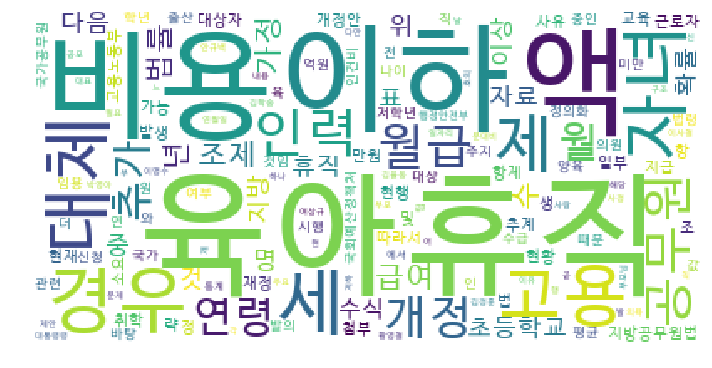

In [28]:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<br>
# **2 문장의 유사도 측정**

<br>
## **1 문장요소를 Vector로 변환하기**

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 1)
contents   = ["메리랑 사귀고 싶은데 바뻐서 어떻게 하죠?",
              "메리는 공원에서 휴식을 취하는데 놀기는 싫어해요",
              "메리는 잠만자서 놀기는 싫어해요 이상해요",
              "먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요"]

In [30]:
# 문장객체를 Vector 연산가능 객체로 학습한다
X = vectorizer.fit_transform(contents)
vectorizer.get_feature_names()

['곳으로',
 '공원에서',
 '그러질',
 '너무',
 '놀기는',
 '떠나고',
 '메리는',
 '메리랑',
 '못하고',
 '바빠서',
 '바뻐서',
 '사귀고',
 '싫어해요',
 '싶은데',
 '어떻게',
 '여행을',
 '이상해요',
 '있어요',
 '잠만자서',
 '취하는데',
 '하죠',
 '휴식을']

In [31]:
# 형태소를 근거로 token을 분리한 결과객체를 저장한다
contents_tokens = [t.morphs(row)  for row  in contents]
contents_tokens

[['메리', '랑', '사귀', '고', '싶은', '데', '바뻐', '서', '어떻', '게', '하죠', '?'],
 ['메리', '는', '공원', '에서', '휴식', '을', '취하는', '데', '놀기', '는', '싫어해', '요'],
 ['메리', '는', '잠', '만', '자서', '놀기', '는', '싫어해', '요', '이상해', '요'],
 ['먼',
  '곳',
  '으로',
  '여행',
  '을',
  '떠나고',
  '싶은',
  '데',
  '너무',
  '바빠',
  '서',
  '그러',
  '질',
  '못',
  '하고',
  '있어',
  '요']]

In [32]:
contents_for_vectorize = []
for content in contents_tokens:
    sentence = ''
    # content token 분류된 객체들을 이어서 문장으로 완성한다
    for word in content:
        sentence = sentence + ' ' + word
    contents_for_vectorize.append(sentence)
    
contents_for_vectorize

[' 메리 랑 사귀 고 싶은 데 바뻐 서 어떻 게 하죠 ?',
 ' 메리 는 공원 에서 휴식 을 취하는 데 놀기 는 싫어해 요',
 ' 메리 는 잠 만 자서 놀기 는 싫어해 요 이상해 요',
 ' 먼 곳 으로 여행 을 떠나고 싶은 데 너무 바빠 서 그러 질 못 하고 있어 요']

In [33]:
# 4개의 문장 22개의 코든이 
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 22)

In [34]:
X.toarray().transpose()

array([[0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0]], dtype=int64)

In [35]:
new_post               = ['메리랑 휴식을 취하면서 사랑을 나누고 싶어요']
new_post_tokens        = [t.morphs(row)  for row  in new_post ]
new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
    new_post_for_vectorize.append(sentence)

new_post_for_vectorize

[' 메리 랑 휴식 을 취하면 서 사랑 을 나누고 싶어 요']

In [36]:
# 위에서 생성한 새로운 문당을 벡터화 한다
new_post_vec = vectorizer.transform(new_post_for_vectorize)
new_post_vec.toarray()

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

<br>
## **2 요소간 거리를 측정한다**

In [37]:
import scipy as sp

def dist_rwa(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [38]:
best_doc = None
best_dist = 65535
best_i = None

In [39]:
for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_rwa(post_vec, new_post_vec)
    print(" === Post {} with dist={:.2f} : {}".format(i,d,contents[i]))
    if d < best_dist:
        best_dist = d
        best_i = i

 === Post 0 with dist=2.45 : 메리랑 사귀고 싶은데 바뻐서 어떻게 하죠?
 === Post 1 with dist=2.24 : 메리는 공원에서 휴식을 취하는데 놀기는 싫어해요
 === Post 2 with dist=2.24 : 메리는 잠만자서 놀기는 싫어해요 이상해요
 === Post 3 with dist=3.32 : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [40]:
# contents 문장들 중 가장 유사한 sentence 출력하기
print("Best post is {}, dist = {:.2f} \n --> {} \n ----> {}".format(
    best_i, best_dist, 
    new_post,
    contents[i]))

Best post is 1, dist = 2.24 
 --> ['메리랑 휴식을 취하면서 사랑을 나누고 싶어요'] 
 ----> 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [41]:
# 유사도 검증하기
for i in range(0, len(contents)):
    print("{} \n ------------------------------ \n{}".format(
        X.getrow(i).toarray(),
        new_post_vec.toarray()))

[[0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0]] 
 ------------------------------ 
[[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
[[1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1]] 
 ------------------------------ 
[[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
[[0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0]] 
 ------------------------------ 
[[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
[[0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0]] 
 ------------------------------ 
[[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]


In [42]:
def dist_norm(v1, v2):
    v1_normalized = v1 / sp.linalg.norm(v1.toarray())
    v2_normalized = v2 / sp.linalg.norm(v2.toarray())
    delta = v1_normalized - v2_normalized
    return sp.linalg.norm(delta.toarray())

In [43]:
# contents 문장들 중 가장 유사한 sentence 출력하기
print("Best post is {}, dist = {:.2f} \n --> {} \n ----> {}".format(
    best_i, best_dist, 
    new_post,
    contents[best_i]))

Best post is 1, dist = 2.24 
 --> ['메리랑 휴식을 취하면서 사랑을 나누고 싶어요'] 
 ----> 메리는 공원에서 휴식을 취하는데 놀기는 싫어해요


In [44]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log(float(len(D)) / (len([doc  for doc  in D 
                                     if  t in doc])))
    return tf, idf

In [45]:
a, abb, abc = ['a'], ['a','b','b'], ['a','b','c']
D = [a, abb, abc]
tfidf('a', a, D)

(1.0, 0.0)

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')

In [47]:
contents_tokens = [t.morphs(row)   for row in contents]
contents_for_vectorize = []
for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
    contents_for_vectorize.append(sentence)

In [48]:
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 22)

In [49]:
vectorizer.get_feature_names()

['공원',
 '그러',
 '너무',
 '놀기',
 '떠나고',
 '메리',
 '바빠',
 '바뻐',
 '사귀',
 '싫어해',
 '싶은',
 '어떻',
 '에서',
 '여행',
 '으로',
 '이상해',
 '있어',
 '자서',
 '취하는',
 '하고',
 '하죠',
 '휴식']

In [50]:
new_post = ['근처 공원에 메리랑 놀러가고 싶네요']
new_post_tokens = [t.morphs(row)  for row in new_post]
new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
new_post_for_vectorize

[' 근처 공원 에 메리 랑 놀 러 가고 싶네 요']

<br>
# **Exo Brain API 활용하기**
API설명서 : http://aiopen.etri.re.kr/doc_language.php

데모구현 : http://aiopen.etri.re.kr/demo.php

In [51]:
"morp" # 형태소 분석
"wsd" # 어휘의미 분석 (동음이의어 분석)
"wsd_poly" # 어휘의미 분석 (다의어 분석)
"ner" # 개체명 인식
"dparse" # 의존 구문 분석
"srl" # 의미역 인식

'srl'

In [52]:
# http://dgkim5360.tistory.com/entry/python-requests
url = "http://aiopen.etri.re.kr:8000/WiseNLU"
# url_voca = "http://aiopen.etri.re.kr:8000/WiseNLU"
accessKey = "b63fbca8-af8b-44be-bf89-0d1a1589c79a"

text = "배"

data = {
    "access_key": accessKey,
    "argument": {
        "text": text,
        "analysis_code": "wsd_poly" # 의존 구문 분석 analysisCode
        }
    } 

import requests, json
res = requests.post(url, data=json.dumps(data))
result = res.json()

In [53]:
result

{'result': 0,
 'return_object': {'doc_id': '',
  'DCT': '',
  'category': '',
  'category_weight': 0.0,
  'title': {'text': '', 'NE': ''},
  'metaInfo': {},
  'sentence': [{'id': 0.0,
    'reserve_str': '',
    'text': '배',
    'morp': [{'id': 0.0,
      'lemma': '배',
      'type': 'NNG',
      'position': 0.0,
      'weight': 0.391613}],
    'WSD': [{'id': 0.0,
      'text': '배',
      'type': 'NNG',
      'scode': '020000',
      'weight': 1.0,
      'position': 0.0,
      'begin': 0.0,
      'end': 0.0}],
    'word': [{'id': 0.0, 'text': '배', 'type': '', 'begin': 0.0, 'end': 0.0}],
    'NE': [],
    'dependency': [],
    'SRL': []}],
  'entity': []}}

In [54]:
result['return_object']['sentence'][0]['morp']

[{'id': 0.0, 'lemma': '배', 'type': 'NNG', 'position': 0.0, 'weight': 0.391613}]

In [55]:
result['return_object']

{'doc_id': '',
 'DCT': '',
 'category': '',
 'category_weight': 0.0,
 'title': {'text': '', 'NE': ''},
 'metaInfo': {},
 'sentence': [{'id': 0.0,
   'reserve_str': '',
   'text': '배',
   'morp': [{'id': 0.0,
     'lemma': '배',
     'type': 'NNG',
     'position': 0.0,
     'weight': 0.391613}],
   'WSD': [{'id': 0.0,
     'text': '배',
     'type': 'NNG',
     'scode': '020000',
     'weight': 1.0,
     'position': 0.0,
     'begin': 0.0,
     'end': 0.0}],
   'word': [{'id': 0.0, 'text': '배', 'type': '', 'begin': 0.0, 'end': 0.0}],
   'NE': [],
   'dependency': [],
   'SRL': []}],
 'entity': []}

In [56]:
import urllib3
import json
 
openApiURL = "http://aiopen.etri.re.kr:8000/WiseNLU"
analysisCode = "dparse"
text = "무슨 일을 할줄아니?"
 
requestJson = {
    "access_key": accessKey,
    "argument": {
        "text": text,
        "analysis_code": analysisCode
    }
}
 
http = urllib3.PoolManager()
response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(requestJson)
)
 
print("[responseCode] " + str(response.status))
print("[responBody]")
print(str(response.data,"utf-8"))

[responseCode] 200
[responBody]
{"result":0,"return_object":{"doc_id":"","DCT":"","category":"","category_weight":0.0,"title":{"text":"","NE":""},"metaInfo":{},"sentence":[{"id":0.0,"reserve_str":"","text":"무슨 일을 할줄아니?","morp":[{"id":0.0,"lemma":"무슨","type":"MM","position":0.0,"weight":0.047573},{"id":1.0,"lemma":"일","type":"NNG","position":7.0,"weight":0.472126},{"id":2.0,"lemma":"을","type":"JKO","position":10.0,"weight":0.129611},{"id":3.0,"lemma":"할","type":"VV","position":14.0,"weight":0.0},{"id":4.0,"lemma":"줄","type":"JKC","position":17.0,"weight":0.0},{"id":5.0,"lemma":"아","type":"VCN","position":20.0,"weight":0.0},{"id":6.0,"lemma":"니","type":"EF","position":23.0,"weight":0.0535175},{"id":7.0,"lemma":"?","type":"SF","position":26.0,"weight":1.0}],"WSD":[{"id":0.0,"text":"무슨","type":"MM","scode":"00","weight":0.0,"position":0.0,"begin":0.0,"end":0.0},{"id":1.0,"text":"일","type":"NNG","scode":"01","weight":2.2,"position":7.0,"begin":1.0,"end":1.0},{"id":2.0,"text":"을","type":"JKO